# Redes Neuronales Profundas (Fashion_mnist)
**Joel Isaias Solano Ocampo | A01639289**


---



## Importar Tensorflow:
Importamos diferentes librerias necesarias para realizar y visualizar la  aplicacion de redes neuronales profundas en base a nuestros datos:

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

## Preparar Dataset Fashion_mnist:
Obtenemos los datos de _Fashion_mnist_ de la libreria _datasets_ obtenida a traves de _tensorflow.keras_:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

## Normalizar:
Normalizamos los datos dividiendo _train_images_ y _test_images_ en 255.0:

In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

## Validacion de datos:
Validamos que todos los datos ya normalizados correspondan en cuanto visualizacion y nombre de las clases para proceder:

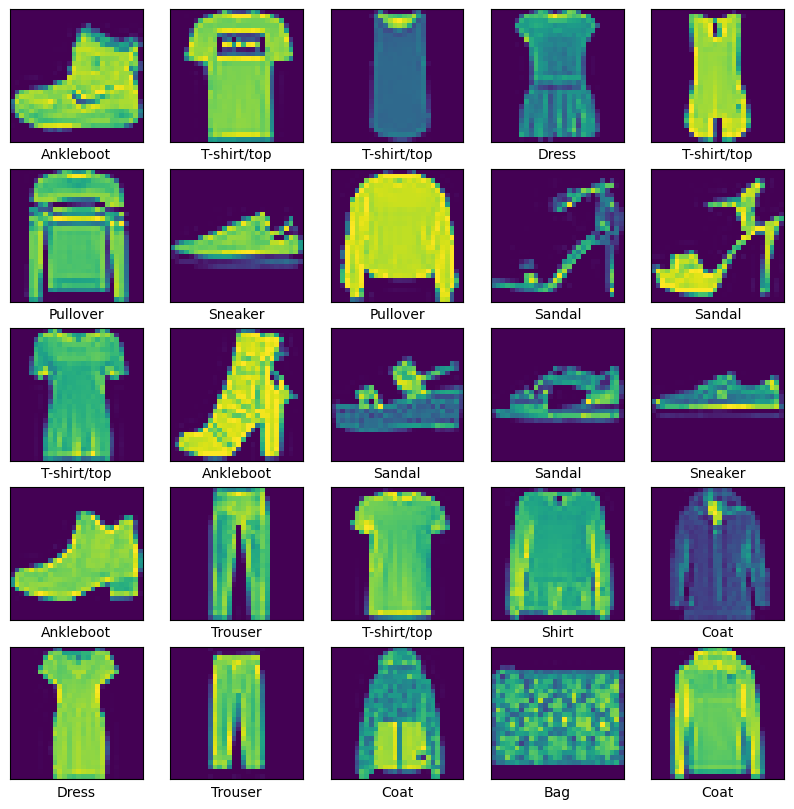

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Capas de convolucion y densas:
Para nuestro modelo, emepzamos a agregar diferentes capas tanto de convolucion como capas densas con diferentes numero de neuronas y diferentes metodos de activacion, tanto _relu_ como _softmax_ dependiendo la capa:

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Arquitectura:
Verificamos que tanto las capas de convolucion como las capas densas hayan sido añadidas correctamente verificando difenrentes parametros como el tipo de capa, forma de la salida de datos y sus respectivos parametros:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Early Stopping:
Realizamos un callback que nos permitira detener el entrenamiento en el numero oprtimo de _epochs_ al momento de que detecte que los resultados del entrenamiento dejen de mejorar:

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

## Model Checkpoint:
Realizamos otro callback quee nos permitira elegir el mejor modelo para nuestro entrenamiento en base a nuestro Dataset _Fashion_mnist_:

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'fashion_mnist_best_model.h5',
    save_best_only=True
)

## Entrenamiento:
Una vez llegado a este punto, por fin podemos comenzar con el entrenamiento del modelo con los datos, usando como optimizador a _adam_, usando un loss de _SparseCategoricalCrossentropy_ y tomando como metricas el _accuracy_.

Para el historial del entrenamiento, tomamos los _labels_ e _images_ de entrenamiento y realizamos un _epochs_ de 30, un _batch_size_ de 64 y un _validation_split_ de 0.2.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs = 30,
                    batch_size= 64,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
750/750 [==============================] - 56s 73ms/step - loss: 0.5752 - accuracy: 0.7930 - val_loss: 0.3880 - val_accuracy: 0.8562
Epoch 2/30
750/750 [==============================] - 45s 60ms/step - loss: 0.3708 - accuracy: 0.8657 - val_loss: 0.3313 - val_accuracy: 0.8778
Epoch 3/30
750/750 [==============================] - 48s 64ms/step - loss: 0.3197 - accuracy: 0.8824 - val_loss: 0.2913 - val_accuracy: 0.8943
Epoch 4/30
750/750 [==============================] - 47s 63ms/step - loss: 0.2878 - accuracy: 0.8957 - val_loss: 0.2771 - val_accuracy: 0.8998
Epoch 5/30
750/750 [==============================] - 46s 61ms/step - loss: 0.2673 - accuracy: 0.9014 - val_loss: 0.2824 - val_accuracy: 0.8938
Epoch 6/30
750/750 [==============================] - 46s 61ms/step - loss: 0.2460 - accuracy: 0.9082 - val_loss: 0.2572 - val_accuracy: 0.9043
Epoch 7/30
750/750 [==============================] - 47s 63ms/step - loss: 0.2310 - accuracy: 0.9125 - val_loss: 0.2507 - val_accuracy:

## Resultados de entrenamiento:
Visualizamos en una grafica (donde el eje x representa el numero de _epoch_ y el eje y el puntaje del _accuracy_) los resultados obtenidos de _accuracy_ y _val_accuracy_ en base al entrenamiento previamente realizado.

313/313 - 3s - loss: 0.2609 - accuracy: 0.9078 - 3s/epoch - 8ms/step


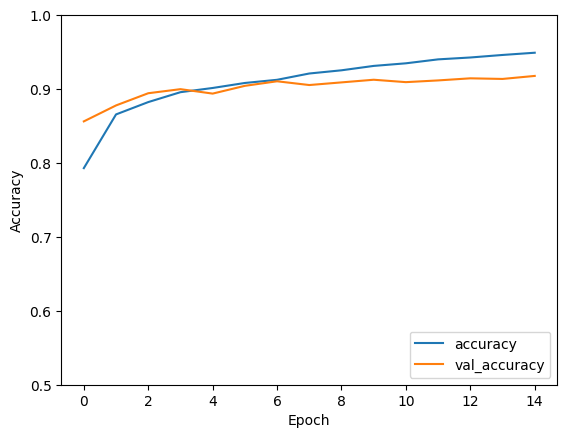

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

In [ ]:
print(test_acc)

0.907800018787384


## Prediccion:
Para verificar la prediccion de nuestro modelo ya entrenado con los datos de verificacion, obtenemos un dato aleatorio y validamos su contenido:

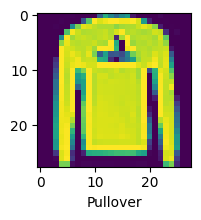

In [ ]:
n = 115
plt.figure(figsize=(2,2))
plt.imshow(test_images[n])
plt.xlabel(class_names[test_labels[n]])
plt.show()

## Resultados de prediccion:
Para terminar, realizamos la prediccion de nuestro modelo ya entrenado con dicho dato aleatorio y verificamos si la imagen pertenece a dicha clase y checamos la probabilidad:

In [ ]:
predictions = model.predict(test_images)
print(predictions[n])

import numpy as np

print('La imagen pertenece al grupo {} con una probabilidad de {:2f} %'
      .format(class_names[np.argmax(predictions[n])], 100 * np.max(predictions[n])))

313/313 [==============================] - 4s 13ms/step
[1.0270049e-04 3.7728087e-10 9.9791288e-01 6.5165198e-09 7.9432043e-04
 1.3070492e-11 1.1901793e-03 2.3485546e-13 1.6240094e-09 4.1643694e-14]
La imagen pertenece al grupo Pullover con una probabilidad de 99.791288 %
